<a href="https://colab.research.google.com/github/cdkuea/456469ek-/blob/main/Maestr%C3%ADa_teor%C3%ADa_03_Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/dieguito1331/cienciaDatos/blob/master/maestria/teoria/03 - Gradient Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensembles**
Los models estadísticos y de Machine Learning poseen un problema que es el equilibrio entre el sesgo (bias) y la varianza (variance)  
El concepto de **sesgo** hace referencia a cuánto en promedio los valores con respecto a los valores reales. Es decir, nos dice qué tan real es la relación que encontró entre los predictores y la variable respuesta.  
El término varianza nos dice cuánto cambia el model dependiendo de los datos utilizados en el entrenamiento. Lo que uno espera que un model pueda _**generalizar**_ su comportamiento, es decir, que con observaciones sucesivas (diferentes a las que se utilizó en el entrenamiento) el model no varíe demasiado sus resultados.  
A medida que se aumenta la complejidad del model, éste logra adaptarse mejor a la realidad que se debe modelar, no obstante, si esta complejidad no es medida, puede aparecer un concepto denominado _overfitting_, esto significa que el model se ajusta tanto a los datos de entrenamiento que no es capaz de identificar nuevas observaciones. Por tal motivo, el mejor model será aquel que pueda equilibrar de la mejor manera el sesgo y la varianza.  
La gran pregunta será, ¿cómo puedo controlar el sesgo y la varianza? Los árboles pequeños tienen poca varianza pero consiguen representar bien la relación entre las variables (alto sesgo). Por el contrario, árboles grandes se ajustan mucho a los datos de entrenamiento, por ende el sesgo es bajo pero la varianza es muy alta. Un método para resolver esta problemática es trabajar con métodos de _ensembles_.  


# **Gradient Boosting**
Este tipo de algoritmos se basa en algoritmos débiles o _weak learners_. Es un conjunto de árboles entrenados de forma secuencial, de forma que cada nuevo árbol trata de mejorar los errores de los árboles anteriores. Los models basados en árboles trabajan segmentando el espacio de los predictores en regiones más simples, dentro de los cuale es más sencillo manejar las interacciones.

Los métodos basados en árboles se han convertido en uno de los referentes dentro del ámbito predictivo debido a los buenos resultados que generan en problemas muy diversos. 

Un model Gradient Boosting Trees está formado por un conjunto (ensemble) de árboles de decisión individuales, entrenados de forma secuencial. Cada nuevo árbol emplea información del árbol anterior para aprender de sus errores, mejorando iteración a iteración. En cada árbol individual, las observaciones se van distribuyendo por bifurcaciones (nodos) generando la estructura del árbol hasta alcanzar un nodo terminal. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el model.



# **Implementación del Descenso del Gradiente**

Para poder entender cómo trabaja el algoritmo de optimización del descenso del gradiente utilizaremos un ejemplo usando una regresión lineal para poder entender el funcionamiento

In [ ]:
#Defino las librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
#Ejemplos para usar la librería sympy https://claudiovz.github.io/scipy-lecture-notes-ES/packages/sympy.html
import sympy as sym
from sklearn.linear_model import LinearRegression
import os
from google.colab import drive


## Creo un modelo lineal que dados los datos el valor b = 0. Por ende la recta creada será y = mx

Intersección con eje Y (b): 0.00
Pendiente (m): 2.10
Suma de cuadrados de los residuos (RSS): 31.42


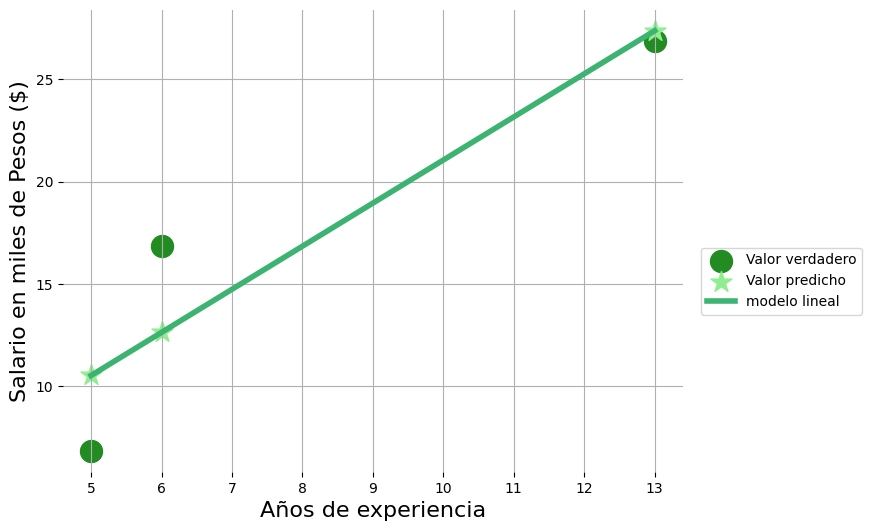

In [ ]:
#Creo el data set para poder trabajar
# Los parámetros que vamos a optimizar serán los de una recta. y = mx+b

# Variable independiente
experience = np.array([[5], [6], [13]]) #un vector de 3 filas y 1 col. 
# Variable target
salary = np.array([6.85, 16.83, 26.84])

#calcula el valor de m.
model = LinearRegression().fit(experience.reshape(3,-1),
                                salary)

# Visualización de datos y model.  predict() utiliza la información que trae model para predecir la variable y.  %0.2f define el formato del intercept, floating con 2 decimales.
print("Intersección con eje Y (b): %0.2f" % model.intercept_)
print("Pendiente (m): %0.2f" % model.coef_[0]) #mostrar el vector con la unica pendiente en este caso.
print("Suma de cuadrados de los residuos (RSS): %0.2f" %
      ((salary - model.predict(experience))**2).sum())

plt.figure(figsize=(8, 6))

plt.scatter(experience, salary, color="forestgreen", s=250,
            marker="o", label="Valor verdadero")

plt.scatter(experience, model.predict(experience),
            color="lightgreen", s=250, marker="*", label="Valor predicho") 

plt.plot(experience, model.predict(experience),
         linewidth=4, color="mediumseagreen", label="modelo lineal") 

plt.ylabel("Salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de experiencia", size=16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()


## Comenzaremos a trazar diversas rectas (cambiando las pendientes) para encontrar aquella pendiente que se ajuste de la mejor forma al modelo anterior. 


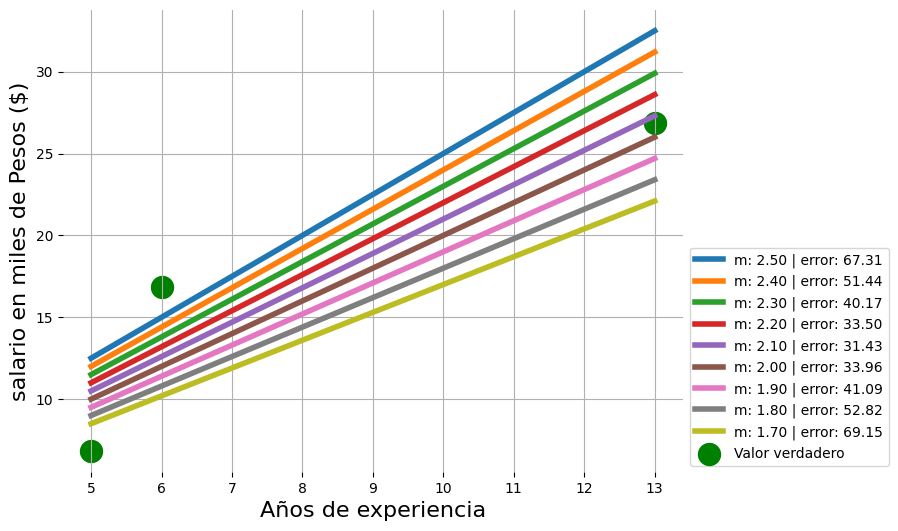

In [ ]:
experience = experience.reshape(3)

# Creación de múltiples slopes para exploración
slopes = np.arange(2.5, 1.6, -0.1)

# Vector para almacenar el error de los diferentes models
errores = np.array([])

# Visualización de modelos

plt.figure(figsize=(8, 6))

for slope in slopes: 
    # Error del model (suma de cuadrados de los residuos)
    error = ((slope*experience - salary)**2).sum()

    # Visualización de un model para una slope dada
    plt.plot(experience, slope*experience, linewidth=4, 
             label="m: %0.2f | error: %0.2f" %
            (slope, error)) 
    
    errores = np.append(errores, error)

plt.scatter(experience, salary, color="green", s=250,
            marker="o", label="Valor verdadero")

plt.ylabel("salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de experiencia", size=16)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid()
plt.box(False)
plt.show()

## Graficamos los errores de cada una de las rectas ejecutadas 

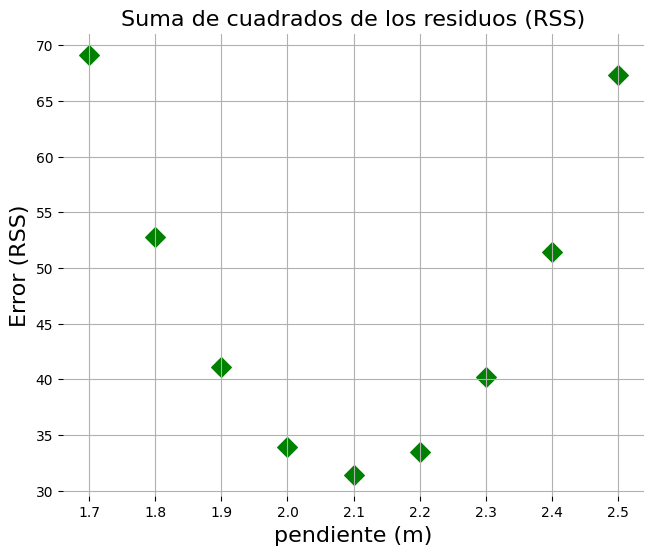

In [ ]:
plt.figure(figsize=(7.5, 6))
plt.title("Suma de cuadrados de los residuos (RSS)", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("pendiente (m)", size=16)
plt.scatter(slopes, errores, color="green", marker="D", s=99) 
plt.grid()
plt.box(False)
plt.show()

### Función de Error a ser Minimizada
### Suma de los cuadrados de los residuos (RSS)

$$\text{RSS}(y, \hat{y}) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

$$ y_i = \text{salary}_i $$

$$ \hat{y}_i = m\cdot\text{experience}_i $$


Donde $y$ son los valores verdaderos, $\hat{y}$ son los valores predichos y $n$ es el tamaño de la muestra.

## Calculamos la derivada de la funcion del error.

In [ ]:
# persona1: (6.85, 5) persona2: (16.83, 6) persona3: (26.84, 13)

m = sym.Symbol("m") #crea la variable simbolica m que representa la pendiente.

# Función de error
error = (6.85 - m*5)**2 + (16.83 - m*6)**2 + (26.84 - m*13)**2
derivada_error=2*(6.85-5m)+2*(16.83-6m)+2*(26.84-13m)

# Derivada de la función de error
derivada = sym.diff(error, m)

for slope in slopes:
    print(slope, "Evaluación %0.2f" % derivada.evalf(subs={m: slope})) #reemplazar "derivada" por "slope".

460.0*m - 968.3 Evaluación 181.70
460.0*m - 968.3 Evaluación 135.70
460.0*m - 968.3 Evaluación 89.70
460.0*m - 968.3 Evaluación 43.70
460.0*m - 968.3 Evaluación -2.30
460.0*m - 968.3 Evaluación -48.30
460.0*m - 968.3 Evaluación -94.30
460.0*m - 968.3 Evaluación -140.30
460.0*m - 968.3 Evaluación -186.30


## Graficamos cada tangente (con la derivada) en cada uno de los puntos. 

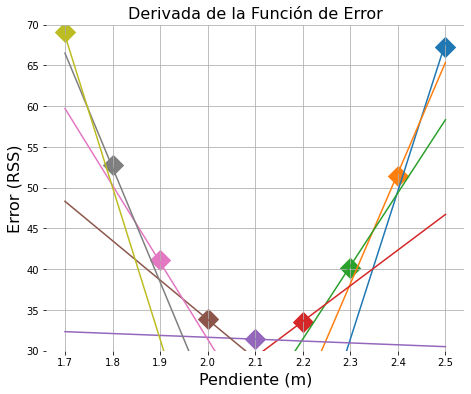

In [ ]:
#Visualizamos las diferentes derivadas 
#Recordar que las derivadas son la pendiente de la tangente en el punto evaluado
plt.figure(figsize=(7.5, 6))

for i in range(0, len(errores), 1):
    # Error de un modelo dado
    plt.scatter(slopes[i], errores[i], 
                label="%0.2f" % derivada.evalf(subs={m: slopes[i]}),
                marker="D", s=200) 
    
    # Evaluación de la derivada para un error dado
    slope = derivada.evalf(subs={m: slopes[i]})
    
    plt.plot(np.array([1.7, 2.5]), 
             np.array([1.7, 2.5])*slope + 
             slope*(-2.3 + i*0.05) + errores.min()) #grafica la recta tangente

plt.title("Derivada de la Función de Error", size=16)
plt.ylabel("Error (RSS)", size=16)
plt.xlabel("pendiente (m)", size=16)
plt.ylim(30, 70)
plt.grid()
plt.box(False)
plt.show()

## Creamos un modelo en donde b != 0
y = mx+b

Intersección con eje Y (b): -4.38
slope (m): 2.45
Suma de cuadrados de los residuos (RSS): 4.03


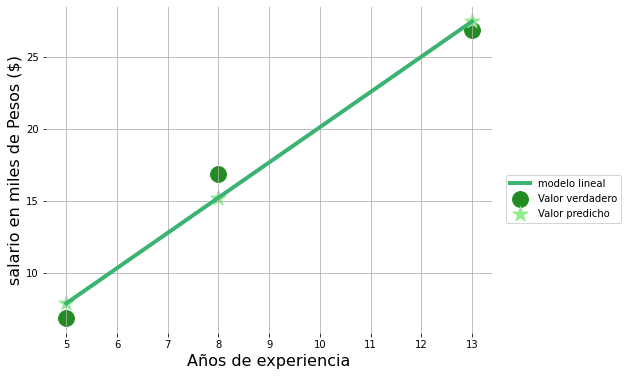

In [ ]:
# Datos casi iguales, pero con un cambio en la experiencia 
experience = np.array([[5], [8], [13]]) 

# Variable objetivo
salary = np.array([6.85, 16.83, 26.84])

# model lineal creado con el método de mínimos cuadrados
model = LinearRegression().fit(experience.reshape(3, -1),
                                salary)

# Visualización de datos y model
print("Intersección con eje Y (b): %0.2f" % model.intercept_)
print("slope (m): %0.2f" % model.coef_[0])
print("Suma de cuadrados de los residuos (RSS): %0.2f" %
      ((salary - model.predict(experience))**2).sum())

plt.figure(figsize=(8, 6))

plt.scatter(experience, salary, color="forestgreen", s=250,
            marker="o", label="Valor verdadero")

plt.scatter(experience, model.predict(experience),
            color="lightgreen", s=250, marker="*", label="Valor predicho") 

plt.plot(experience, model.predict(experience),
         linewidth=4, color="mediumseagreen", label="modelo lineal") 

plt.ylabel("salario en miles de Pesos ($)", size=16)
plt.xlabel("Años de experiencia", size=16)
plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.box(False)
plt.show()

## Definimos nuevamente los diferentes errores utilizando diferentes valores en m y b

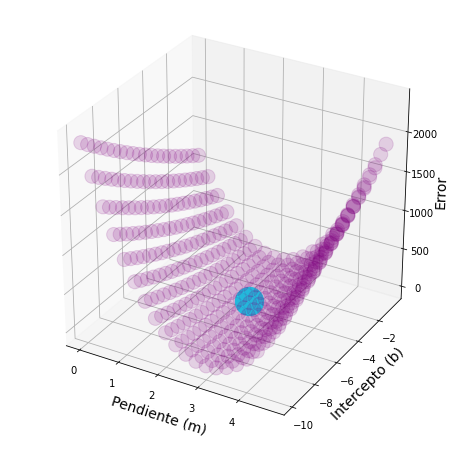

In [ ]:
#Defino la función de error para cualquier conjunto de valores.
def error_RSS(m, b, X, Y):
    error = 0
    for x,y in zip(X,Y):
      error = error + (y - (m*x + b))**2
    return error


# Generación de rejilla (pendientes, interceptos, errores)

puntos = np.zeros(shape=(400,3))
i = 0
for pendiente in np.arange(0, 5, 0.25):
    for intercepto in np.arange(-10, 0, 0.50):
        puntos[i][0] = pendiente
        puntos[i][1] = intercepto
        puntos[i][2] = error_RSS(pendiente, intercepto, experience, salary)
        i += 1

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

# Mínimo global
ax.scatter(2.45, -4.38, 4.03,
           marker="o", c="cyan", s=800)

# Todos los otros puntos
ax.scatter(puntos.T[0], puntos.T[1], puntos.T[2],
           marker="o", c="purple", s=200, alpha=0.15) #alpha marca el nivel de la transparencia de los puntos

ax.set_xlabel('Pendiente (m)', size=14)
ax.set_ylabel('Intercepto (b)', size=14)
ax.set_zlabel('Error', size=14)
plt.show()

## Calculamos las derivadas parciales de la función

In [ ]:
m, b = sym.symbols("m b")

error = (6.85 - (m*5 + b))**2 + (16.83 - (m*8 + b))**2 + (26.84 - (m*13 + b))**2

derivada_error_m = sym.diff(error, m)

derivada_error_b = sym.diff(error, b)

print(derivada_error_m)

print(derivada_error_b)

52.0*b + 516.0*m - 1035.62
6.0*b + 52.0*m - 101.04


## Cálculo del descenso del gradiente
1.   iteraciones máximas = 10000
2.   iteración = 0
3.   tasa de aprendizaje = 0.001
4.   inicialización aleatoria de parámetros
5.   mientras (iteración < iteraciones máximas) hacer:

  6.   calcular gradientes en la posición actual
  7.   actualizar parámetros en función de los gradientes y la tasa de 
  8.   iteración +=1

Fórmula del descenso de gradiente
$$\theta_{n+1} = \theta_n - \alpha \bigtriangledown f(\theta_n)$$
$\alpha$ = learning rate (en el ejemplo está definido como 0.001  
$\theta$ = los parámetros a optimizar. En nuestro caso m y b


In [ ]:
n_iter = 10000
learning_rate = 0.001

# Inicialización aleatoria de pendiente y intercepto 
pendiente = 0
intercepto = -10

errores = np.zeros(shape=(10000, 3))

for i in range(n_iter):
    # Cálculo de los gradientes
    gradientes = [derivada_error_m.evalf(subs={m : pendiente,
                                               b : intercepto}),
                  derivada_error_b.evalf(subs={m : pendiente,
                                               b : intercepto})]
    
    # Actualización de parámetros 
    pendiente = pendiente - learning_rate*gradientes[0]
    intercepto = intercepto - learning_rate*gradientes[1]
    
    # Registro de los errores
    errores[i][0] = pendiente
    errores[i][1] = intercepto
    errores[i][2] = error_RSS(pendiente, intercepto, experience,salary)
    
    
# Valores calculados vía el Método de Mínimos Cuadrados de sklearn
# Pendiente (m): 2.44898163
# Intercepto (b): -4.382390816326527
    
print("Derivada pendiente (m) =", gradientes[0])
print("Derivada intercepto (b) =", gradientes[1])
print("m =", pendiente, "b =", intercepto)

Derivada pendiente (m) = 0.000218445852030267
Derivada intercepto (b) = -0.00216449575579388
m = 2.44835147659091 b = -4.37940660844884


## Visualizamos el camino recorrido en el descenso del gradiente

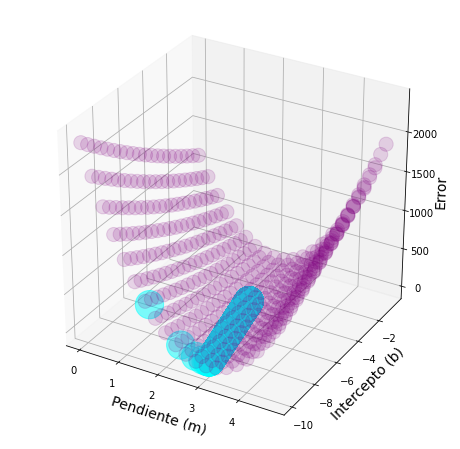

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")

# Camino decreciente de errores
ax.scatter(errores.T[0], errores.T[1], errores.T[2],
           marker="o", c="cyan", s=800, alpha=0.5)

# Todos los otros puntos
ax.scatter(puntos.T[0], puntos.T[1], puntos.T[2],
           marker="o", c="purple", s=200, alpha=0.15)

ax.set_xlabel('Pendiente (m)', size=14)
ax.set_ylabel('Intercepto (b)', size=14)
ax.set_zlabel('Error', size=14)
plt.show()

# **Implementación de Boosting**


In [ ]:
import pandas as pd
import numpy as np
#Este seteo de pandas sirve para que se puedan visualizar todas las columnas
#del dataframe#############################
pd.set_option('display.max_columns', None)#
###########################################

#Esta librería sirve para que oculte todo tipo de warnings que puedan 
#aparecer en el código. Generalmente si una función está por ser data de 
#baja o modificada en una librería, varias versiones antes aparecen estos
#tipos de advertencias cuando se ejecuta el código
import warnings###################
warnings.filterwarnings("ignore")#
##################################

#La función train_test_split sirve para dividir la base en dos partes
#Train y test para poder entrenar y validar un model#
from sklearn.model_selection import train_test_split##
######################################################

#Definimos las métricas
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve

import matplotlib.pyplot as plt


#Importo AdaBoost
from sklearn.ensemble import AdaBoostClassifier
#Importo la gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
#Importo el XGBoost
from xgboost import XGBClassifier
#Importo lightgbm
from lightgbm import LGBMClassifier



import os
from google.colab import drive


### Monto la carpeta de Drive

In [ ]:
#Levanto drive para poder almacenar los archivos
drive.mount("/content/drive")
contentFolder = "/content/drive/MyDrive/Austral - Data Mining"
if not os.path.exists(contentFolder):
    os.mkdir(contentFolder)

Mounted at /content/drive


## Adaboost (Adaptative Boosting)
Es un clasificador que iterativamente crea _weak learners_ de forma secuencial. Cada observación tiene un peso que se inicializan todos con el mismo valor. A medida que los learners son entrenados, las observaciones pueden ser clasificadas de forma correcta o incorrecta. Las que son clasificadas de forma incorrecta, se les sube el peso, mientras que las que son clasificadas de forma correcta se les baja para que el próximo learner le de más importancia a las que peor clasificó.

El resultado final de una nueva observación, será una agregación de los resultados parciales de todos los árboles creados en el algoritmo.  
La documentación se encuentra [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)


### Levanto la base 

In [ ]:
data = pd.read_csv("{}/titanicPreprocesada.txt".format(contentFolder), sep=";")

In [ ]:
data.head()

,index,Survived,Age,Fare,ageRatioTitle,woe_sibSp,withFamily,woe_parch,woe_title,ageRatioClass,fareRatioClass
0,0,0,22.000000,7.2500,0.785714,0.613513,1,-0.173905,-1.202121,0.916667,0.329545
1,1,1,26.000000,7.9250,1.194086,-0.166010,1,-0.173905,1.297772,1.083333,0.304808
2,2,0,35.000000,8.0500,1.250000,-0.166010,1,-0.173905,-1.202121,1.458333,0.230000
3,3,0,21.773973,8.4583,0.777642,-0.166010,1,-0.173905,-1.202121,0.907249,0.388459
4,4,0,2.000000,21.0750,0.500000,-0.484418,1,0.671764,0.758775,0.083333,10.537500


### Divido la base
Divido la base en dos partes, una parte para entrenar el model (la llamaré train) y otra parte con la que testearé el model (la llamaré test)  
Utilizo una función de la librería scikit que se denomina train_test_split() y la documentación la pueden entrondar [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
X = data.drop(columns = ["index", "Survived"])
y = data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
probabilidadesFinales = X_test.copy()
probabilidadesFinales["Survived"] = y_test #crear un nuevo dataset que combina X_test con la columna de survived del Y_test. 

### Entreno un modelo AdaBoost

In [ ]:
clf = AdaBoostClassifier(n_estimators=300, random_state=0).fit(X_train, y_train) #100 arboles 

In [ ]:
probabilidadesFinales["AdaBoost"] = clf.predict_proba(X_test)[:,-1] #agregar una nueva columna Adaboost, la cual predice la survival prob. 

In [ ]:
accuracy = accuracy_score (y_test, probabilidadesFinales["AdaBoost"] > 0.5) #0.5 es el umbral, si la prob es mayor a 0.5 le asigno 1 y si es menor, le asigno 0
print("Accuracy del modelo AdaBoost: %0.4f" % accuracy)

Accuracy del modelo AdaBoost: 0.7898


##Gradient Boosting
Este algoritmo es similar al Adaboost, ya que es de la familia de los boosting y por ende el entrenamiento de nuevos _weak learners_ es secuencial. Pero a diferencia del primero, en vez de optimizar la función de error mediante pesos, utiliza una optimización de una función de pérdida o costo mediante la generación de nuevos learners secuenciales.   
La función de costo tiene que ser diferenciable.  
la idea general es entrenar modelos de forma secuencial, de forma que cada modelo ajusta los residuos (errores) de los modelos anteriores.

$$f_1(x) \approx y$$
$$f_2(x) \approx y - \lambda f_1(x)$$
$$f_3(X) \approx y - \lambda f_1(x) - \lambda f_2(x)$$
$$y \approx \lambda f_1(x) + \lambda f_2(x) + \lambda f_3(x) + ... + \lambda f_m(x)$$

donde $m$ es la cantidad de iteraciones del algoritmo

La documentación se encuentra [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
probabilidadesFinales["gradientBoosting"] = clf.predict_proba(X_test)[:,-1]

In [ ]:
accuracy = accuracy_score (y_test, probabilidadesFinales["gradientBoosting"] > 0.5)
print("Accuracy del modelo Gradient Boosting: %0.4f" % accuracy)

Accuracy del modelo Gradient Boosting: 0.8373


##XGBoost o Extreme Gradient Boosting
Es uno de los algoritmos más utilizado actualmente. creado en el 2016 por Tianqi Chen posee muchas ventajas en performance y en resultados

Una de las ventajas de este algoritmo es la implementación de un concepto denominado **_binning_**

### Binning
Uno de los principales cuellos de botella que se genera en el algoritmo de Gradient Boosting es la búsqueda de los umbrales (o thresholds) de las diferentes variables numéricas. Para realizar esto, se deben ordenar las observaciones acorde a cada predictor y computacionalmente es muy costoso.
La estrategia de binning trata de discretizar las variables continuas. Normalmente se utilizan los cuantiles para este trabajo. El único problema que puede ocurrir es que al discretizar una variable continua, se puede incurrir en una pérdida de información.

La documentación se encuentra [aquí](https://xgboost.readthedocs.io/en/stable/)

In [ ]:
clf = XGBClassifier().fit(X_train, y_train)
probabilidadesFinales["xgBoost"] = clf.predict_proba(X_test)[:,-1]

In [ ]:
accuracy = accuracy_score (y_test, probabilidadesFinales["xgBoost"] > 0.5)
print("Accuracy del modelo XGBoost: %0.4f" % accuracy)

Accuracy del modelo XGBoost: 0.8237


## LightGBM
Es una implementación del descenso del gradiente realizada por Microsoft.
La documentación del algoritmo se encuentra [aquí](https://lightgbm.readthedocs.io/en/v3.3.2/)

In [ ]:
clf = LGBMClassifier().fit(X_train, y_train)
probabilidadesFinales["lightGBM"] = clf.predict_proba(X_test)[:,-1]

In [ ]:
accuracy = accuracy_score (y_test, probabilidadesFinales["lightGBM"] > 0.5)
print("Accuracy del modelo LightGBM: %0.4f" % accuracy)

Accuracy del modelo LightGBM: 0.7932


## Creo el gráfico _Feature Importance_

Es una técnica que nos ayuda a calcular un score para todos los _features_ (o características). Simplemente representa la importancia que posee cada característica sobre el model. A mayor score significa que posee mayor efecto sobre el model.


([<matplotlib.axis.XTick at 0x7fe084e4aa10>,
 [Text(0, 0, 'Fare'),
  Text(0, 0, 'fareRatioClass'),
  Text(0, 0, 'ageRatioTitle'),
  Text(0, 0, 'ageRatioClass'),
  Text(0, 0, 'Age'),
  Text(0, 0, 'woe_title'),
  Text(0, 0, 'woe_sibSp'),
  Text(0, 0, 'woe_parch'),
  Text(0, 0, 'withFamily')])

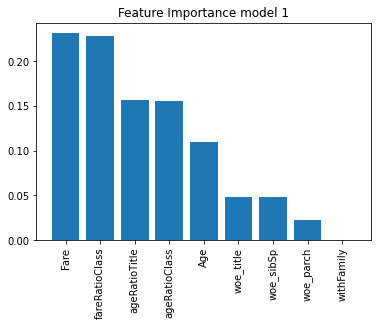

In [ ]:
#La importancia de las variables o feature importance nos permite identificar entre todos los models débiles que se generan las variables que más aparecen y te los pondera para 
#dar una explicación de las variables
importances = clf.feature_importances_
importances = importances / importances.sum()
indices = np.argsort(importances)[::-1][0:20]
names = [X_train.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance model 1")
plt.bar(range(len(names)), importances[indices])
plt.xticks(range(len(names)), names, rotation=90)


## Grafico la curva ROC del Tree y LightGBM juntos

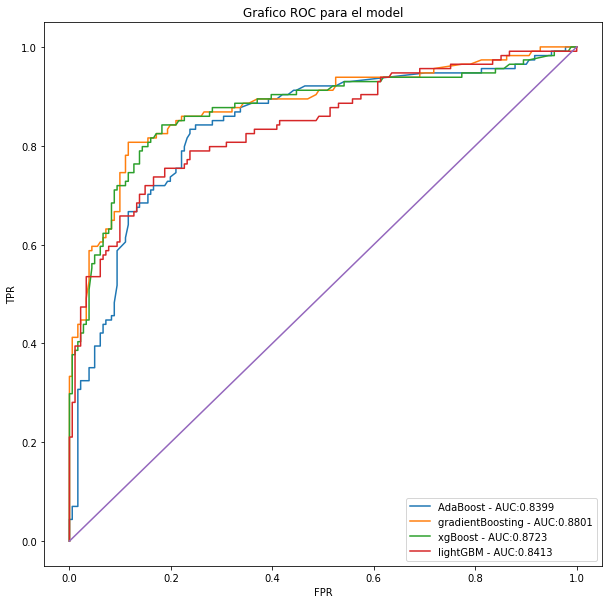

In [ ]:
#De esta forma graficamos la curva ROC y calculamos el área debajo de la curva
plt.figure(figsize=(10,10))
plt.title("Grafico ROC para el model")

for model in probabilidadesFinales.columns[-4:]:
  areaBajoCurva = roc_auc_score(y_test, probabilidadesFinales[model])
  fpr, tpr, _ = roc_curve(y_test, probabilidadesFinales[model])
  plt.plot(fpr, tpr, label="{} - AUC:{}".format(model, round(areaBajoCurva,4)))


plt.legend(loc="lower right")
plt.plot([0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()